__Problem Statement__: <br/>
In exploring the question, __'Does price positively effect customer satisfaction?'__ we aim to understand if higher pricing in wedding services like catering, venue, dress and attire, etc. leads to greater client satisfaction. For instance, does a more expensive wedding cake from a renowned baker lead to higher satisfaction compared to a less costly option?

__Key Terms__: <br/>
__Price__: In the context of our wedding consultancy business, price refers to the amount charged for various services like catering, attire, or venue. The pricing strategy can impact consumer perceptions and their satisfaction with the service. For example, a luxury-priced wedding dress may be perceived as higher quality compared to an inexpensive one. [1]

__Price-Quality Signaling__: This concept suggests that consumers often interpret higher prices as indicators of superior quality. In our case, if a wedding vendor charges a premium, clients might expect an elevated level of service, which can affect their satisfaction. An example is a high-priced wedding venue that signals luxury and exclusivity, potentially enhancing customer satisfaction due to perceived higher quality. [2]

__Customer Satisfaction__: This measures the level of contentment clients have with the services provided. In the wedding industry, satisfaction can stem from various factors like the quality of service, the ambiance of the venue, or the fit and finish of attire. High customer satisfaction in weddings is crucial for repeat business and positive word-of-mouth. [3]



__Key Insights__: <br/>

__Insight 1:__ <br/>
For 'photo and video' services, the moderate positive correlation (0.26) between higher prices and perceived quality aligns with Retently's concept of __price-quality signaling__. Investing in premium offerings is likely to enhance customer satisfaction, as higher prices often signal better quality. To enhance customer satisfaction, businesses can invest in state-of-the-art equipment and technology, ensuring superior image and video quality. Additionally, offering personalized and creative services, such as custom-themed photo shoots or unique video editing styles, can provide a premium and tailored experience that justifies higher pricing. [2]

However, in the 'jewelry' category, the moderate negative correlation (-0.34) suggests that higher prices do not necessarily translate to increased satisfaction. This reflects Retently's point about the importance of pricing strategy and customer perception. Jewelers should focus on providing value through craftsmanship and unique designs, rather than just raising prices. Both insights emphasize the need for businesses to align their pricing strategies with customer perceptions of value to improve satisfaction.

__Insight 2:__ <br/>
The San Francisco county displays a strong positive correlation (0.73) between price and customer satisfaction, with the highest number of reviews (18,168). This suggests businesses operating there could enhance customer satisfaction by offering premium services that customers are willing to pay more for, potentially due to the association of price with quality. To attract more reviews and further improve, businesses could implement loyalty programs or exclusive events that encourage clients to share their experiences. For example, a wedding venue in San Francisco county could offer a special package where couples receive a discount on their booking fee after posting a review of their experience, seamlessly blending the allure of a prestigious location with the encouragement for client feedback.

In contrast, the Contra Costa county having a strong positive correlation (0.73) but with a lower review count (5,322), may benefit from focusing on value-based pricing strategies. Businesses here can improve by ensuring that their services offer a clear value proposition, which could be communicated through targeted marketing campaigns that encourage satisfied customers to leave reviews. For instance, a catering company in Contra Costa County could offer a special promotion where clients who post a review get entered into a quarterly draw for a gourmet dinner party, thus incentivizing reviews while underscoring their commitment to quality and customer satisfaction.

__BUSINESS QUESTION: Does price positively effect customer satisfaction?__

In summary, the analysis shows that in wedding services, the relationship between price and customer satisfaction varies. In San Francisco County, a high positive correlation (0.73) with a large review count (18,168) suggests that higher prices enhance customer satisfaction. However, for services like jewelry, with a negative correlation (-0.34), higher prices don't guarantee increased satisfaction. Overall, while price can positively impact satisfaction in specific cases like high-end photo and video services (0.26), cake (0.21), wedding planners (0.13), it's not universally applicable across all departments as we have many departments showcasing negative values for correlations like flowers (-0.17), rentals (-0.08), etc. 

Thus, we can't conclusively say that price positively effect customer satisfaction. We have to be skeptical and dig deeper into department level analysis, county-specific analysis to come up with insights and refine our understanding of this complex relationship within the wedding services industry.

__Assumptions made during the analysis:__

1. Analysis assumes counties with 30+ entries are sufficient for reliability, aligning with Central Limit Theorem guidelines.

2. Weighted average customer satisfaction scores are used in the 2nd part (bubble chart), assuming they more accurately represent true customer experiences based on review volume.

3. Kendall Tau's correlation is chosen for its suitability with the ordinal 'affordability' data.

4. Cities are categorized into counties, assuming it accurately reflects the geographical distribution of the wedding market.

5. 'Price' is operationalized as 'affordability_numeric' and 'customer satisfaction' as 'avg_stars', assuming these are meaningful for the study.

6. It is assumed that the wedding services market within each county is homogeneous, enabling valid comparisons and correlations.

7. Assumed that calculated correlations are statistically significant and reflect true relationships, without further hypothesis testing.

8. Kendall Tau's Correlation values are interpreted as follows: <br/>
0 to 0.25: weak <br/>
0.25 to 0.5: moderate <br/>
0.5 to 0.75: strong <br/>
0.75 to 1.0: very strong <br/>

    This one's interesting because I looked at various online sources and they were providing different values for the correlation strength for Kendall Tau. So, decided to come up with a standard scale for this report. 

In [1]:
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt # Import matplotlib for data visualization
import seaborn as sns # Import seaborn for enhanced data visualization

# Storing the path to the dataset
file = "weddings_subset.csv"

# converting data types with a dictionary
data_types = {"function_id" : str} 

# reading the file into Python through pandas
weddings_data = pd.read_csv(filepath_or_buffer = file,       
                            header     = 0, # Use the first row as column names      
                            dtype      = data_types)  # applying new data types

# Note: Both function_id and affordability in our dataset represent categorical variables but 
# function_id is directly treated as a string because its numerical representation doesn't 
# have a meaningful order (nominal data), whereas affordability represents an ordinal category, where the order 
# does matter (inexpensive < affordable < moderate < luxury). This is why converting affordability to a 
# numeric scale for analysis can be justifiable, as it preserves the inherent order of the categories.

# Defining the price mapping. Converting this variable to numeric value for analysis purposes. 
price_mapping = {'inexpensive': 1, 'affordable': 2, 'moderate': 3, 'luxury': 4}

# Using the replace method and generating a new column affordability_numeric in the dataframe which 
# will be used for correlation analysis
weddings_data['affordability_numeric'] = weddings_data['affordability'].replace(price_mapping)

# Checking results, using .head method to display the first 5 values by default
weddings_data.head()

,vendor_id,vendor,function_id,functions,city,affordability,reviews,avg_stars,affordability_numeric
0,cak01,charlies cheesecake works,11,cake,san jose,inexpensive,780,4.7,1
1,cak02,cream,11,cake,concord,inexpensive,642,4.8,1
2,cak03,cake a bakin,11,cake,novato,inexpensive,94,3.7,1
3,cat32,steel smokin bbq catering,08,catering,contra costa,inexpensive,62,4.2,1
4,cat33,slider shack,08,catering,san francisco,inexpensive,144,4.6,1


In [ ]:
#Ignore this code block!!
weddings_corr = weddings_data.corr(method = 'pearson', 
                                   min_periods =30, 
                                   numeric_only = True).round(decimals =2)

In my initial analysis, I used Pearson correlation to explore the relationships between 'affordability', 'avg_stars', and 'reviews'. Pearson correlation is often preferred for its simplicity and direct approach in linear relationships. However, I later recognized that the Pearson method’s assumption of continuous and normally distributed variables was not ideal for the dataset, particularly given the ordinal nature of 'affordability'. Consequently, I shifted to Kendall Tau's correlation. 

This alternative approach is better suited for the dataset as it effectively handles ordinal data, like the 'affordability' variable, and does not require the assumption of normal distribution. This method is better at capturing the strength and direction of relationships between variables that are ranked, rather than measured on a continuous scale, thus providing a more accurate and appropriate analysis for the dataset.


In [2]:
# Calculating Kendall correlation between 'affordability_numeric', 'avg_stars' and 'reviews'
correlation_kendall = round(weddings_data[['affordability_numeric', 'avg_stars', 'reviews']].corr(method='kendall'), ndigits=4)
correlation_kendall

,affordability_numeric,avg_stars,reviews
affordability_numeric,1.0000,0.0031,0.0303
avg_stars,0.0031,1.0000,-0.3061
reviews,0.0303,-0.3061,1.0000


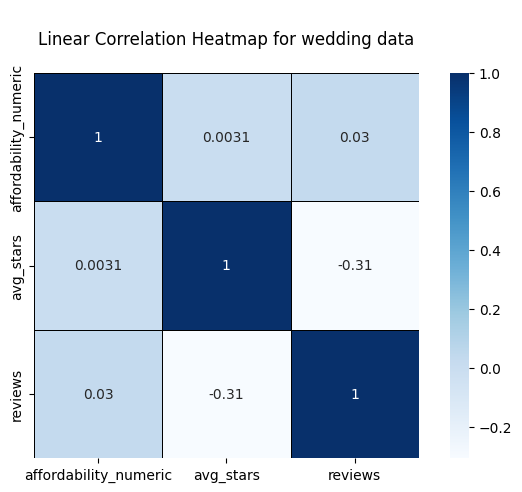

In [3]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (8, 5) )

# developing a heatmap
sns.heatmap(data       = correlation_kendall, # the correlation matrix
            cmap       = 'Blues'    , # changing to Blues colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be?

# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for wedding data
""")

# showing the finished product
plt.show(block = True)

The Kendall correlation analysis between 'affordability_numeric' and 'avg_stars' in the dataset reveals a very low correlation (0.0031), indicating that price (affordability) has a negligible effect on customer satisfaction in wedding services.

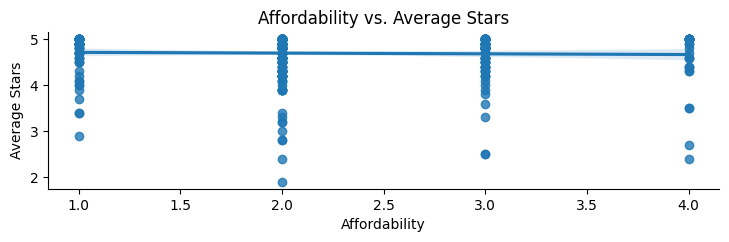

In [4]:
# Instantiating an lmplot for affordability_numeric and avg_stars
sns.lmplot(x       = 'affordability_numeric', # x-axis feature
           y       = 'avg_stars',             # y-axis feature
           scatter = True,                    # renders a scatter plot
           fit_reg = True,                    # renders a regression line
           aspect  = 2,                       # aspect ratio for plot
           data    = weddings_data)           # DataFrame where features exist

# Formatting and displaying the visualization
plt.title(label='Affordability vs. Average Stars')
plt.xlabel(xlabel='Affordability')
plt.ylabel(ylabel='Average Stars')
plt.tight_layout(pad=10.0)
plt.show(block=True)

Also, backing the claim about higher prices (affordability) doesn't equate to high customer satisfaction (avg_stars) with a scatterplot.
We can clearly see there is no upward or downward trend between the variables.  <br/><br/>
__Now, we will delve deeper and conduct department wise analysis -__

In [5]:
from scipy import stats # Import the 'stats' module from scipy
# The 'stats' module contains various statistical functions and distributions for data analysis.

# Group data by department
grouped = weddings_data.groupby('functions')

# Initialize a list to store the results
department_correlations = []

# Iterate through each department
for department, data in grouped:
    # Calculate the Kendall's Tau correlation between affordability and avg_stars
    correlation = stats.kendalltau(data['affordability_numeric'], data['avg_stars'])[0]

    # Append the results to the list
    department_correlations.append({'Department': department, 'Correlation': correlation})

# Convert the list to a DataFrame
department_correlations_df = pd.DataFrame(department_correlations).round(decimals = 2)

# Display the results
department_correlations_df


,Department,Correlation
0,cake,0.21
1,catering,0.04
2,dress atire,0.03
3,flowers,-0.17
4,hair and makeup,0.01
5,invitations,-0.07
6,jewelry,-0.34
7,music,-0.06
8,photo and video,0.26
9,rentals,-0.08


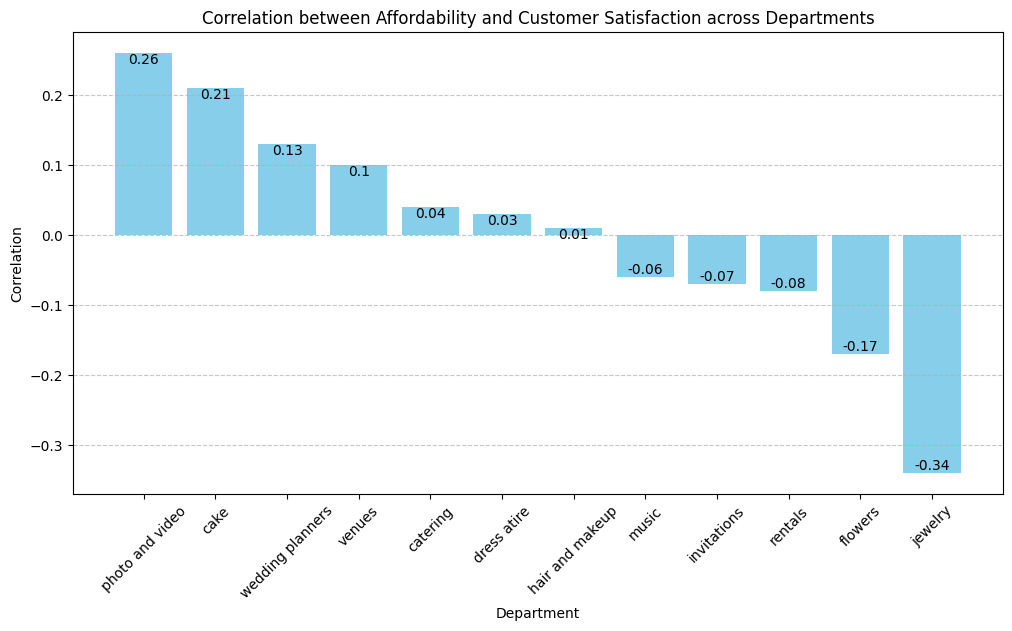

In [6]:
# Sort the DataFrame by 'Correlation' in descending order for better visualization
department_correlations_df.sort_values('Correlation', ascending=False, inplace=True)

# Setting up the plotting area with specified size
plt.figure(figsize=(12, 6))

# Creating a bar chart with 'Department' on the x-axis and 'Correlation' on the y-axis
bars = plt.bar(department_correlations_df['Department'], department_correlations_df['Correlation'], color='skyblue')

# Labeling the x-axis as 'Department'
plt.xlabel('Department')

# Labeling the y-axis as 'Correlation'
plt.ylabel('Correlation')

# Adding a title to the plot
plt.title('Correlation between Affordability and Customer Satisfaction across Departments')

# Rotating the x-axis labels (Department names) for better readability
plt.xticks(rotation=45)

# Adding a grid on the y-axis for visual aid, with a dashed line style and reduced opacity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Looping through each bar in the bar chart to add labels
for bar in bars:
    yval = bar.get_height() # Get the height of the bar (correlation value)
    # Add text (correlation value) above/below each bar, centered horizontally
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             va='bottom' if yval < 0 else 'top', ha='center')

# Displaying the plot
plt.show()


The Kendall Tau's analysis highlights that in wedding services, satisfaction correlates differently with price: higher-priced photo and video services (0.26) align with greater satisfaction, suggesting a premium is placed on memories captured. Conversely, costlier jewelry (-0.34) and flowers (-0.17) do not guarantee higher satisfaction, hinting at the need for reassessment in these categories. This implies that wedding businesses should tailor their pricing strategies to customer expectations within each department.

Building on the insights from department-specific pricing, I now turn to a county-wide analysis to delve deeper into regional preferences. This pivot allows me to understand if the observed trends hold true across different demographics and locations, offering a granular view of how price impacts customer satisfaction in the diverse wedding market landscape.

In [7]:
# Identify all unique cities in the dataset
unique_cities = weddings_data['city'].unique()
unique_cities.sort()  # Sorting for better readability
print(unique_cities)

['acampo' 'alameda' 'alamo' 'antioch' 'berkeley' 'brentwood' 'brisbane'
 'burlingame' 'campbell' 'castro calley' 'concord' 'contra costa'
 'cupertino' 'daly city' 'danville' 'dublin' 'emeryville' 'fairfax'
 'foresthill' 'fremont' 'gilroy' 'half moon bay' 'harbor village'
 'hayward' 'hollister' 'la honda' 'lafayette' 'lakeshore' 'livermore'
 'los altos' 'los gatos' 'marin' 'martinez' 'menlo park' 'millbrae'
 'milpitas' 'modesto' 'monterey' 'mountain view' 'napa' 'newark' 'nicasio'
 'north oakland' 'novato' 'oakland' 'pacifica' 'palo alto' 'pinole'
 'pittsburg' 'pleasant hill' 'pleasanton' 'redwood' 'roseville'
 'san bruno' 'san carlos' 'san francisco' 'san jose' 'san leandro'
 'san mateo' 'san pablo' 'san rafael' 'san ramon' 'santa clara'
 'santa rosa' 'saratoga' 'sausalito' 'solana beach' 'sonoma' 'sunnyvale'
 'sunol' 'telegraph hill' 'walnut creek' 'winters' 'woodside']


In [8]:
# Dictionary for county classification
county_dict = {
    "alameda county": ["alameda", "berkeley", "castro valley", "dublin", "emeryville", "fremont", "hayward", 
                       "livermore", "newark", "oakland", "pleasanton", "san leandro"],
    "contra costa county": ["antioch", "brentwood", "concord", "contra costa", "danville", "lafayette", 
                            "martinez", "pinole", "pittsburg", "pleasant hill", "richmond", "san pablo", 
                            "san ramon", "walnut creek"],
    "marin county": ["fairfax", "marin", "san rafael", "sausalito"],
    "napa county": ["napa"],
    "san francisco county": ["san francisco"],
    "san mateo county": ["brisbane", "burlingame", "daly city", "half moon bay", "menlo park", "millbrae", 
                         "pacifica", "redwood city", "san bruno", "san carlos", "san mateo", "south san francisco", 
                         "woodside"],
    "santa clara county": ["campbell", "cupertino", "gilroy", "los altos", "los gatos", "milpitas", "mountain view", 
                           "palo alto", "san jose", "santa clara", "sunnyvale"],
    "sonoma county": ["santa rosa", "sonoma"],
    "other/outside bay area": []  # Initializing empty list for cities outside Bay Area
}

# Function to classify city into county and ensure all cities are classified
def classify_county(city):
    for county, cities in county_dict.items():
        if city in cities:
            return county
        
    # If city not found in above counties, classify it as "other/outside bay area"
    county_dict["other/outside bay area"].append(city)
    return "other/outside bay area"

# Apply the function to classify each city in the dataset in lowercase
weddings_data['county'] = weddings_data['city'].apply(classify_county)

#Checking for county column which has been added to the dataframe
weddings_data.head()

,vendor_id,vendor,function_id,functions,city,affordability,reviews,avg_stars,affordability_numeric,county
0,cak01,charlies cheesecake works,11,cake,san jose,inexpensive,780,4.7,1,santa clara county
1,cak02,cream,11,cake,concord,inexpensive,642,4.8,1,contra costa county
2,cak03,cake a bakin,11,cake,novato,inexpensive,94,3.7,1,other/outside bay area
3,cat32,steel smokin bbq catering,08,catering,contra costa,inexpensive,62,4.2,1,contra costa county
4,cat33,slider shack,08,catering,san francisco,inexpensive,144,4.6,1,san francisco county


In [9]:
# Counting occurrences of each county
county_counts = weddings_data['county'].value_counts().reset_index(name='count')
county_counts.columns = ['County', 'Count']

# Display the result
county_counts

,County,Count
0,alameda county,119
1,san francisco county,92
2,santa clara county,61
3,other/outside bay area,47
4,san mateo county,45
5,contra costa county,41
6,sonoma county,19
7,napa county,11
8,marin county,7


In [10]:
# Filter to include only counties with 30 or more values
filtered_county_counts = county_counts[county_counts['Count'] >= 30]

# Display the result
filtered_county_counts

,County,Count
0,alameda county,119
1,san francisco county,92
2,santa clara county,61
3,other/outside bay area,47
4,san mateo county,45
5,contra costa county,41


__The reason for excluding counties with less than 30 values is based on statistical principles:__ <br/>
Small sample sizes can lead to unreliable and unstable estimates of parameters and measures, such as means and correlations. They are more susceptible to outliers and may not represent the population well. While, larger samples tend to provide more accurate estimates and are more likely to reflect true population parameters, making the findings more statistically significant. Thus, I have filtered for counties which have more than 30 observations of data. <br/>

__Now, you may ask why 30 and not any other number?__ <br/>
So, in Professor Omar's Business Statistics class, we learned about the __Central Limit Theorem__ which states that minimum 30 sample sizes are sufficient enough to warrant assertions against the findings. The choice of 30 as a threshold is not arbitrary. It's a conventional standard in many statistical practices, often cited as the minimum sample size needed for the CLT to hold, thereby enabling the assumption of a normal distribution for the sample mean. It's also supported by numerous statistical resources, including a detailed explanation provided by Investopedia [4]. According to their article on the Central Limit Theorem, the threshold of 30 samples is generally considered sufficient for the CLT to apply, allowing researchers to make valid inferences about their data.

__NOTE: Another way could have been to combine Sonoma, Napa, Marin county in 1 single county - Miscellaneous. 
But decided to take only counties with more than 30 observations for analysis purposes.__

In [11]:
# Calculate total reviews per county using groupby and sum
total_reviews_per_county = weddings_data.groupby('county')['reviews'].sum()

# Reset the index to turn the series back into a DataFrame for display
total_reviews_per_county_df = total_reviews_per_county.reset_index()
total_reviews_per_county_df

,county,reviews
0,alameda county,11617
1,contra costa county,5322
2,marin county,325
3,napa county,686
4,other/outside bay area,10729
5,san francisco county,18168
6,san mateo county,5699
7,santa clara county,12045
8,sonoma county,1553


In [12]:
# Sorting in descending order
total_reviews_per_county_df = total_reviews_per_county_df.sort_values('reviews', ascending=False)

# Filtering out the counties with less than 30 observations.
counties_to_remove = ['sonoma county', 'napa county', 'marin county']
filtered_reviews_df = total_reviews_per_county_df[~total_reviews_per_county_df['county'].isin(counties_to_remove)]

filtered_reviews_df.reset_index(drop=True, inplace=True)
filtered_reviews_df

,county,reviews
0,san francisco county,18168
1,santa clara county,12045
2,alameda county,11617
3,other/outside bay area,10729
4,san mateo county,5699
5,contra costa county,5322


/var/folders/14/qj0yrj614hs4bbw83ghhpls80000gn/T/ipykernel_30032/560408186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['weighted_avg_stars'] = filtered_data['avg_stars'] * filtered_data['reviews']


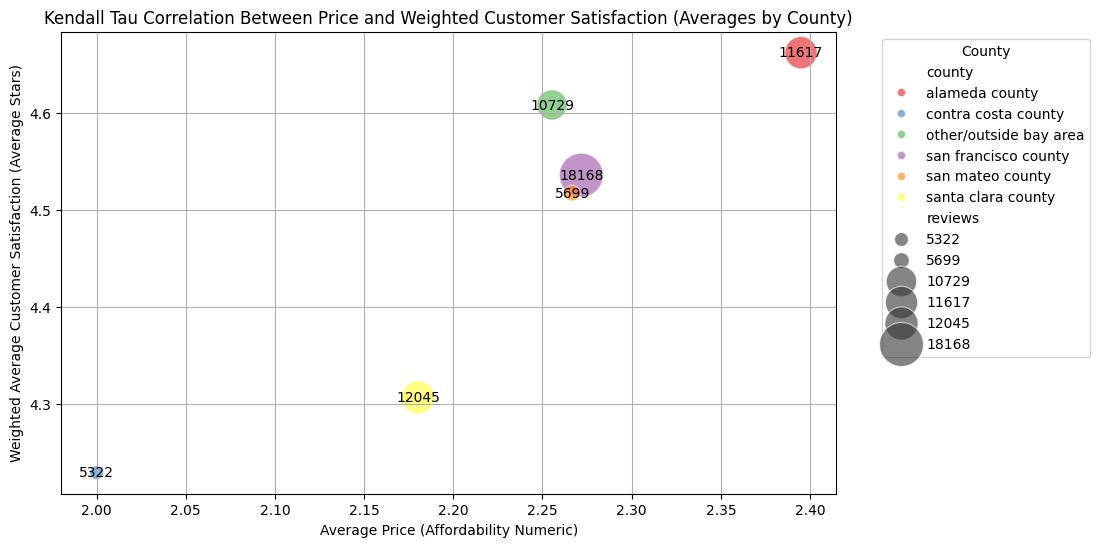

Kendall Tau Correlation Coefficient: 0.73
P-value: 0.06


In [13]:
# List of counties with 30 or more values
selected_counties = filtered_county_counts['County'].tolist()

# Step 1: Filter Data for Selected Counties
filtered_data = weddings_data[weddings_data['county'].isin(selected_counties)]

# Step 2: Calculate the weighted average customer satisfaction score for each county
filtered_data['weighted_avg_stars'] = filtered_data['avg_stars'] * filtered_data['reviews']
county_weighted_data = filtered_data.groupby('county').agg({
    'affordability_numeric': 'mean',  # Average affordability
    'weighted_avg_stars': 'sum',      # Sum of weighted average stars
    'reviews': 'sum'                  # Total number of reviews
}).reset_index()
county_weighted_data['weighted_avg_stars'] /= county_weighted_data['reviews']  # Final weighted average stars

# Step 3: Correlation Analysis Using Kendall Tau
# Now we use 'weighted_avg_stars' instead of 'avg_stars' for the correlation
tau, p_value = stats.kendalltau(county_weighted_data['affordability_numeric'], county_weighted_data['weighted_avg_stars'])
tau = tau.round(decimals = 2)
p_value = p_value.round(decimals = 2)

# Step 4: Visualization with Weighted Average Stars
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='affordability_numeric', 
    y='weighted_avg_stars', 
    hue='county',     # Color the points based on the 'county' column
    size='reviews',  # Use the number of reviews as the size of the scatter plot points
    data=county_weighted_data, 
    palette='Set1',     # Use the 'Set1' color palette
    sizes=(100, 1000),  
    alpha=0.6 ,     # Set the transparency of points to 0.6
)

# Iterate through each row in the 'county_weighted_data' DataFrame
for idx, row in county_weighted_data.iterrows():
        # Add a label to the scatter plot at specified coordinates:
        # 'row['affordability_numeric']': x-coordinate for the label
        # 'row['weighted_avg_stars']': y-coordinate for the label
        # 's=row['reviews']': Display the 'reviews' value as the label text
    plt.text(row['affordability_numeric'], row['weighted_avg_stars'], 
             s=row['reviews'], 
             horizontalalignment='center',
             verticalalignment='center')

# Set the title of the plot
plt.title('Kendall Tau Correlation Between Price and Weighted Customer Satisfaction (Averages by County)')
             
plt.xlabel('Average Price (Affordability Numeric)') 
plt.ylabel('Weighted Average Customer Satisfaction (Average Stars)')

# Add a legend with the title 'County' and adjust its position
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left') 

# Display gridlines in the plot
plt.grid(True)
plt.show()

# Step 5: Output the Kendall Tau Coefficient
print(f"Kendall Tau Correlation Coefficient: {tau}")
print(f"P-value: {p_value}")


__Note: In this analysis, I'm using weighted averages to account for the varying number of reviews across different counties. Weighted averages provide a more representative measure of customer satisfaction by giving more weight to ratings supported by a larger number of reviews. This approach acknowledges that a satisfaction score based on hundreds of reviews likely reflects a broader and more diverse range of customer experiences than a score based on fewer reviews.__

 __REFERENCES__

[1] What is a price? - Back to basics - Finance & development, December 2013. (n.d.). https://www.imf.org/external/pubs/ft/fandd/2013/12/basics.htm

[2] Alex. (2023, July 20). How does your product pricing affect customer satisfaction? Retently. https://www.retently.com/blog/product-pricing-satisfaction/

[3] Franklin, A. (2023, September 6). What is customer satisfaction? Definition + importance. Zendesk. https://www.zendesk.com/blog/3-steps-achieving-customer-satisfaction-loyalty/

[4] Central limit theorem (CLT): Definition and key characteristics. (2007, May 10). Investopedia. https://www.investopedia.com/terms/c/central_limit_theorem.asp